In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb1764edea0>,
 'date': '2010-01-01',
 'tobs': 18.3,
 'id': 0,
 'prcp': 2.0,
 'station': 'USC00519397'}

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

meas_date_desc_first = session.query(Measurement).order_by(Measurement.date.desc()).first()
meas_date_desc_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb1764ed090>,
 'date': '2017-08-23',
 'tobs': 27.2,
 'id': 2723,
 'prcp': 0.0,
 'station': 'USC00519397'}

In [46]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

date_obj = meas_date_desc_first.date
#date_obj
date_iso = dt.date.fromisoformat(date_obj)
print(date_iso)

#date_strp = dt.datetime.strptime(date_obj, '%Y-%m-%d').date()
#date_strp

#date_out = dt.strptime(date_obj, '%Y-%m-%d')
#date_out = dt.date.fromisoformat(date_obj)
#date_out2 = dt.date.strptime(date_obj, '%Y-%m-%d')

subYearNumber = 1;

prcp_date_1yr_prior = date_iso - relativedelta(years=subYearNumber)
#prcp_date_1yr_prior
prcp_last12months_date = prcp_date_1yr_prior.isoformat()
prcp_last12months_date

2017-08-23


'2016-08-23'

In [47]:
prcp_date_last12months_all = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > prcp_last12months_date).all()
prcp_date_last12months_all

[('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('201

In [48]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(prcp_date_last12months_all)
df


,date,prcp
0,2016-08-24,2.0
1,2016-08-25,2.0
2,2016-08-26,0.0
3,2016-08-27,0.0
4,2016-08-28,0.3
...,...,...
2218,2017-08-19,2.3
2219,2017-08-20,NaN
2220,2017-08-21,14.2
2221,2017-08-22,12.7


In [49]:
renamed_df = df.rename(columns={"date":"Meas_Date", "prcp":"Rainfall"})
renamed_df
renamed_count = renamed_df.count()
print(renamed_count)

# clean data by removing NaN data. check column sizes
cleaned_df = renamed_df.dropna(how='any')
cleaned_df
cleaned_count = cleaned_df.count()
print(cleaned_count)
# Sort the dataframe by date
df_sorted_by_date = cleaned_df.sort_values(by='Meas_Date', ascending=False)
df_sorted_by_date



Meas_Date    2223
Rainfall     2015
dtype: int64
Meas_Date    2015
Rainfall     2015
dtype: int64


,Meas_Date,Rainfall
2222,2017-08-23,11.4
1523,2017-08-23,2.0
1005,2017-08-23,0.0
359,2017-08-23,0.0
358,2017-08-22,0.0
...,...,...
1524,2016-08-24,54.6
360,2016-08-24,54.6
1188,2016-08-24,31.0
702,2016-08-24,57.9


In [53]:
df_sorted_by_date['Meas_Date'] = pd.to_datetime(df_sorted_by_date.Meas_Date, format='%Y-%m-%d')

df_avg_by_month = df_sorted_by_date.groupby(df_sorted_by_date['Meas_Date'].dt.day)['Rainfall'].sum()
df_avg_by_month

Meas_Date
1     434.4
2     289.0
3     229.5
4     190.6
5     208.0
6      85.8
7     272.2
8     173.0
9     262.1
10    110.8
11    423.9
12    397.6
13    279.3
14    680.4
15    308.9
16    196.4
17    210.1
18    263.5
19     75.9
20    143.9
21    395.8
22    591.7
23    209.9
24    628.2
25    320.5
26    145.5
27    138.7
28    306.6
29    462.9
30    416.5
31    185.9
Name: Rainfall, dtype: float64

<Axes: title={'center': 'Precipitation'}>

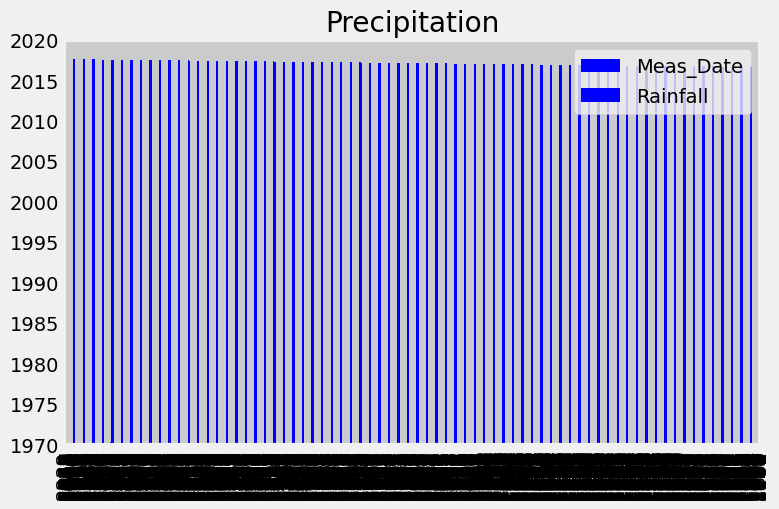

In [56]:
 # Use Pandas Plotting with Matplotlib to plot the data
    
df_sorted_by_date.plot(kind="bar", facecolor="blue", figsize=(8,5),\
                                 title="Precipitation")



In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()